# Browser Usage Analysis - Solution
Import `pandas` and `pyplot` from matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Extract the data from W3Schools about browser usage over time from https://www.w3schools.com/browsers/

In [4]:
tables = pd.read_html('https://www.w3schools.com/browsers/')

Create a column for the year in each of the tables (the values will repeat themselves in each table as each table represnt data from a single year).<br><br>
In addition to that, we would like to merge the columns `IE`, `Edge/IE` and `IE/Edge` together as they are basically the same.<br>Do this by using the ***rename*** method to make sure they are all called "IE" before we combine all the tables together<br>Display the firest table (2019) to preview the data

In [5]:
for table in tables:
    table['Year'] = table.columns[0]
    table.rename(columns = {table.columns[0]: 'Month', 'Edge/IE': 'IE', 'IE/Edge': 'IE'}, inplace = True)
tables[0]

,Month,Chrome,IE,Firefox,Safari,Opera,Year
0,July,80.9 %,3.3 %,9.3 %,2.7 %,1.6 %,2019
1,June,80.7 %,3.6 %,9.4 %,3.1 %,1.7 %,2019
2,May,80.4 %,3.6 %,9.5 %,3.3 %,1.7 %,2019
3,April,80.3 %,3.6 %,9.6 %,3.3 %,1.7 %,2019
4,March,80.0 %,3.8 %,9.6 %,3.3 %,1.7 %,2019
5,February,79.7 %,4.0 %,10.0 %,3.4 %,1.6 %,2019
6,January,79.5 %,4.0 %,10.2 %,3.3 %,1.6 %,2019


Combine all the tables togetherand display 5 first rows

In [6]:
browser_stats = pd.concat(tables, sort=False)
browser_stats.head()

,Month,Chrome,IE,Firefox,Safari,Opera,Year,Mozilla,Netscape,AOL
0,July,80.9 %,3.3 %,9.3 %,2.7 %,1.6 %,2019,NaN,NaN,NaN
1,June,80.7 %,3.6 %,9.4 %,3.1 %,1.7 %,2019,NaN,NaN,NaN
2,May,80.4 %,3.6 %,9.5 %,3.3 %,1.7 %,2019,NaN,NaN,NaN
3,April,80.3 %,3.6 %,9.6 %,3.3 %,1.7 %,2019,NaN,NaN,NaN
4,March,80.0 %,3.8 %,9.6 %,3.3 %,1.7 %,2019,NaN,NaN,NaN


Create a new multi-index from the `Year` and `Month` columns

In [7]:
browser_stats.set_index(['Year', 'Month'], inplace = True)
browser_stats.head()

Chrome     IE Firefox Safari  Opera Mozilla Netscape  AOL
Year Month                                                           
2019 July   80.9 %  3.3 %   9.3 %  2.7 %  1.6 %     NaN      NaN  NaN
     June   80.7 %  3.6 %   9.4 %  3.1 %  1.7 %     NaN      NaN  NaN
     May    80.4 %  3.6 %   9.5 %  3.3 %  1.7 %     NaN      NaN  NaN
     April  80.3 %  3.6 %   9.6 %  3.3 %  1.7 %     NaN      NaN  NaN
     March  80.0 %  3.8 %   9.6 %  3.3 %  1.7 %     NaN      NaN  NaN

Because of the `%` signs, all our data is in string format. Convert all columns to `float`.<br>**Bonus:** insterad of performing the same operation for each column seperatly, try to use a loop to apply the conversion to all of them at once

In [8]:
for column in browser_stats.columns:
    browser_stats[column] = browser_stats[column].str[:-2]
    browser_stats[column] = browser_stats[column].astype('float')
browser_stats.head()

Chrome   IE  Firefox  Safari  Opera  Mozilla  Netscape  AOL
Year Month                                                             
2019 July     80.9  3.3      9.3     2.7    1.6      NaN       NaN  NaN
     June     80.7  3.6      9.4     3.1    1.7      NaN       NaN  NaN
     May      80.4  3.6      9.5     3.3    1.7      NaN       NaN  NaN
     April    80.3  3.6      9.6     3.3    1.7      NaN       NaN  NaN
     March    80.0  3.8      9.6     3.3    1.7      NaN       NaN  NaN

Sort the index in ascending order so we can plot the data chronologically

In [9]:
browser_stats.sort_index(inplace=True)
browser_stats.head()

Chrome    IE  Firefox  Safari  Opera  Mozilla  Netscape  AOL
Year Month                                                                 
2002 January      NaN  85.8      NaN     NaN    NaN      NaN       7.9  2.8
     July         NaN  84.5      NaN     NaN    NaN      NaN       7.3  3.5
     March        NaN  86.1      NaN     NaN    NaN      NaN       7.7  3.0
     May          NaN  86.7      NaN     NaN    NaN      NaN       7.3  2.8
     November     NaN  83.4      NaN     NaN    NaN      NaN       8.0  5.2

To improve the austhetics of our chart, change the notebook's default style to a theme of your choosing (for exmaple - `"bmh"`)

In [11]:
plt.style.use('bmh')

Plot the data in a line chart to show the trend of each browser type over time. Increase the size of the plotting area so it covers the entire width of the notebook and rotate the x labels so they are easier to read

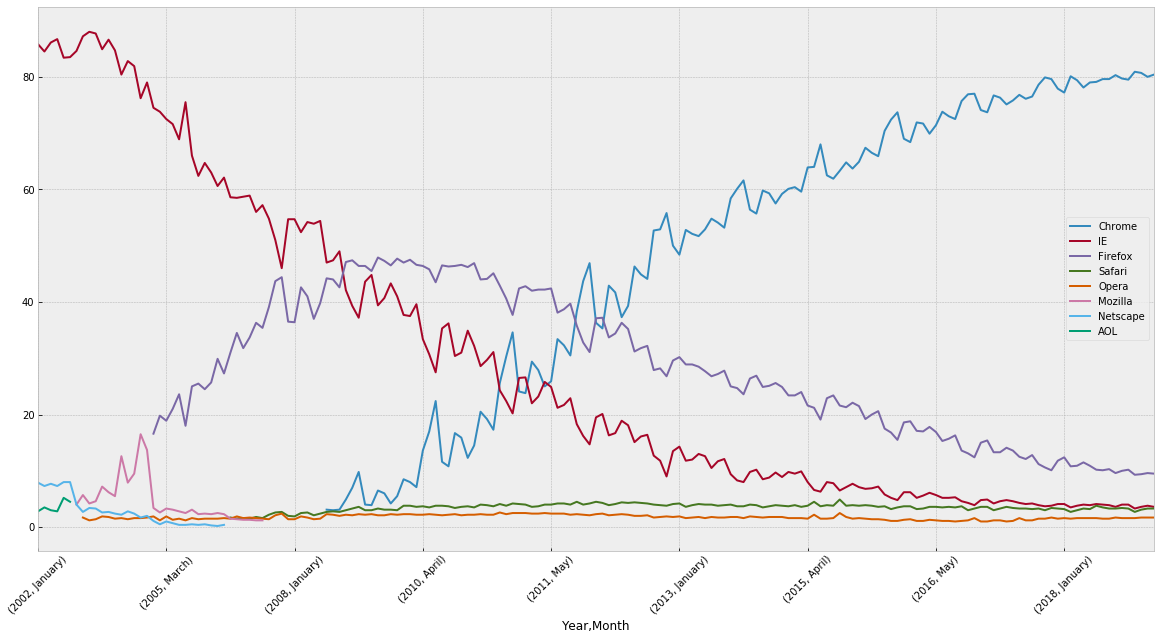

In [12]:
browser_stats.plot.line(figsize = (20,10), rot = 45)